In [95]:
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pickle
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
import math

In [96]:
def save_fig(name):
    plt.savefig(f'../figures/dataset/{name}.png', dpi=300)

In [97]:
from data_loader import DataLoader
loader = DataLoader(train_size=0.8, alpha=5)

/opt/miniconda3/envs/thesis/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/thesis/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


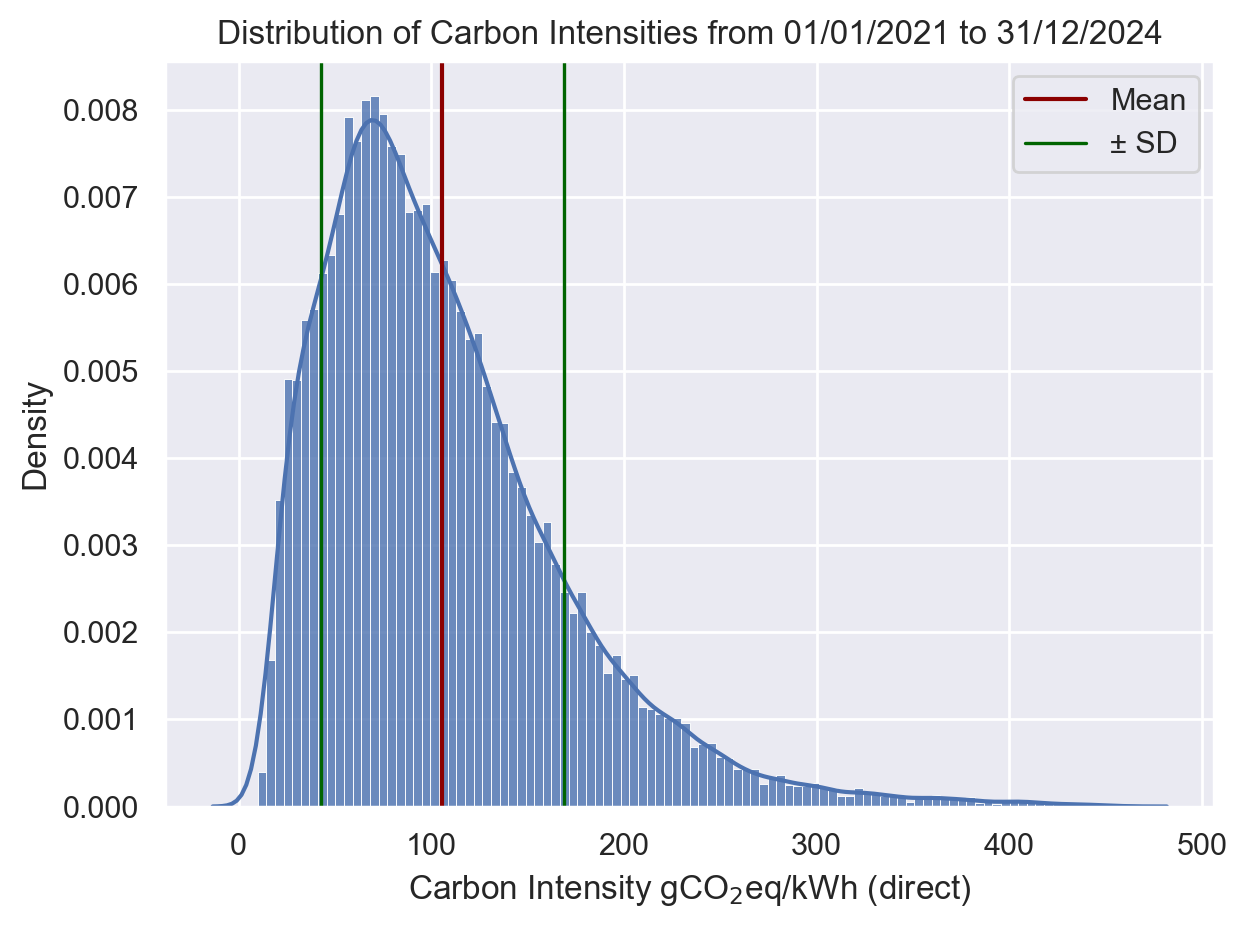

In [98]:
loader.plot_hist()


In [99]:
# loader.data
unique = len(np.unique(loader.data['carbon_intensity']))
print(len(loader.data))
norm_unique = len(np.unique(loader.data['normalized']))

decimals = [1,2,3,4,5,6]
for d in decimals:
    rounded_unique = len(np.unique(np.round(loader.data['normalized'], d)))
    print(f"{d} decimal makes length = {rounded_unique}")
    if rounded_unique != norm_unique:
        print(f"{d} decimals is not okay")
    else:
        print(f"{d} is okay")

35064
1 decimal makes length = 11
1 decimals is not okay
2 decimal makes length = 100
2 decimals is not okay
3 decimal makes length = 880
3 decimals is not okay
4 decimal makes length = 5885
4 decimals is not okay
5 decimal makes length = 16891
5 is okay
6 decimal makes length = 16891
6 is okay


In [100]:
data = loader.data['normalized']
max_data = len(data)


splitter = TimeSeriesSplit(n_splits=10)
for fold, (train, test) in enumerate(splitter.split(data)):
    print(fold)
    print(f'min train = {train[0]}, max train = {train[-1]}: %{len(train)/max_data}')
    print(f'min test = {test[0]}, max test = {test[-1]}: %{len(test)/max_data}')
    print(len(train) + len(test))

print('---')
train_size = 0.9
split_idx = int(len(data) * train_size)
train_idx = data.iloc[0:split_idx]
test_idx = data.iloc[split_idx:]

train_keys = train_idx.keys()
train_vals = train_idx.values

test_keys = test_idx.keys()
test_vals = test_idx.values
print(f'min_train = {train_keys[0]}, max_train = {train_keys[-1]}, train size = {len(train_idx)}: ${len(train_idx)/max_data}')
print(f'min_test = {test_keys[0]}, max_test = {test_keys[-1]}, test size = {len(test_idx)}: ${len(test_idx)/max_data}')
# print(f'test size = {len(test_idx)}: ${len(test_idx)/max_data}')



0
min train = 0, max train = 3193: %0.09109057723020762
min test = 3194, max test = 6380: %0.09089094227697923
6381
1
min train = 0, max train = 6380: %0.18198151950718686
min test = 6381, max test = 9567: %0.09089094227697923
9568
2
min train = 0, max train = 9567: %0.2728724617841661
min test = 9568, max test = 12754: %0.09089094227697923
12755
3
min train = 0, max train = 12754: %0.3637634040611453
min test = 12755, max test = 15941: %0.09089094227697923
15942
4
min train = 0, max train = 15941: %0.45465434633812457
min test = 15942, max test = 19128: %0.09089094227697923
19129
5
min train = 0, max train = 19128: %0.5455452886151038
min test = 19129, max test = 22315: %0.09089094227697923
22316
6
min train = 0, max train = 22315: %0.636436230892083
min test = 22316, max test = 25502: %0.09089094227697923
25503
7
min train = 0, max train = 25502: %0.7273271731690623
min test = 25503, max test = 28689: %0.09089094227697923
28690
8
min train = 0, max train = 28689: %0.8182181154460415


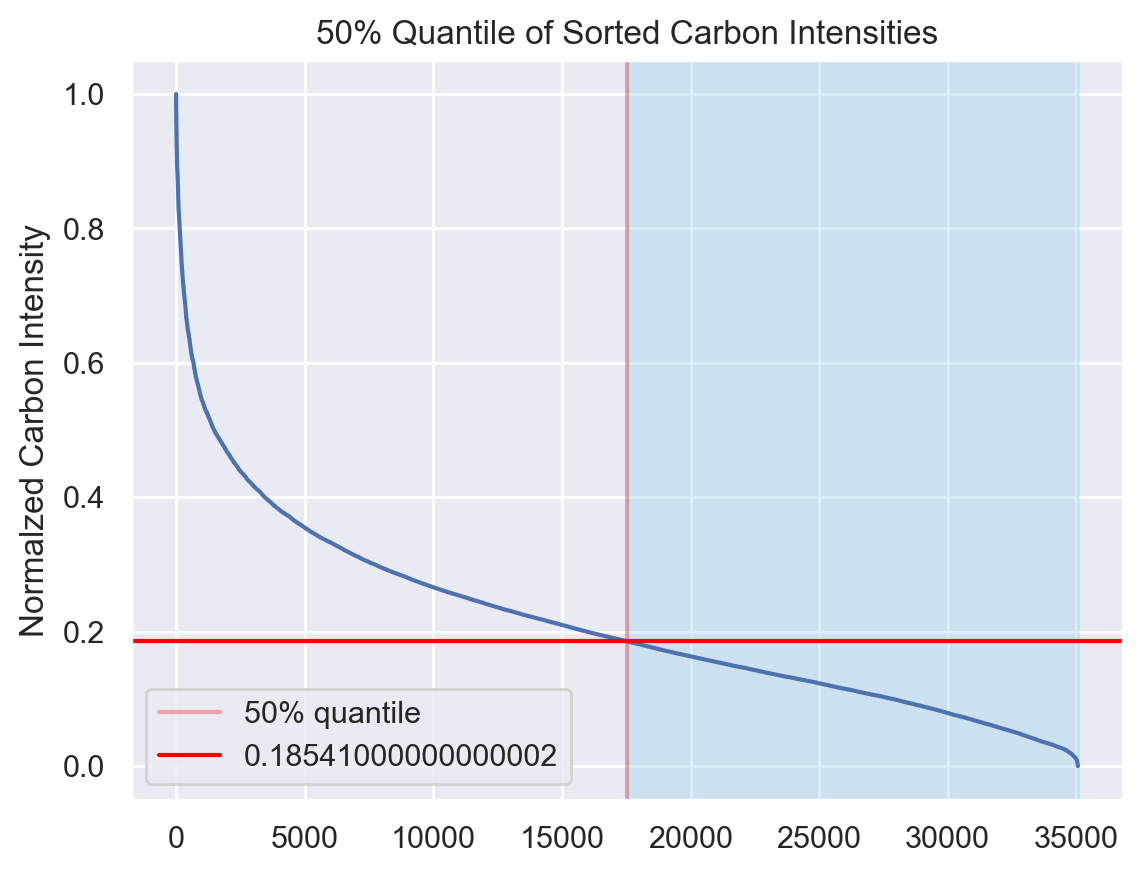

In [101]:
loader.plot_quantile_ranges(2)

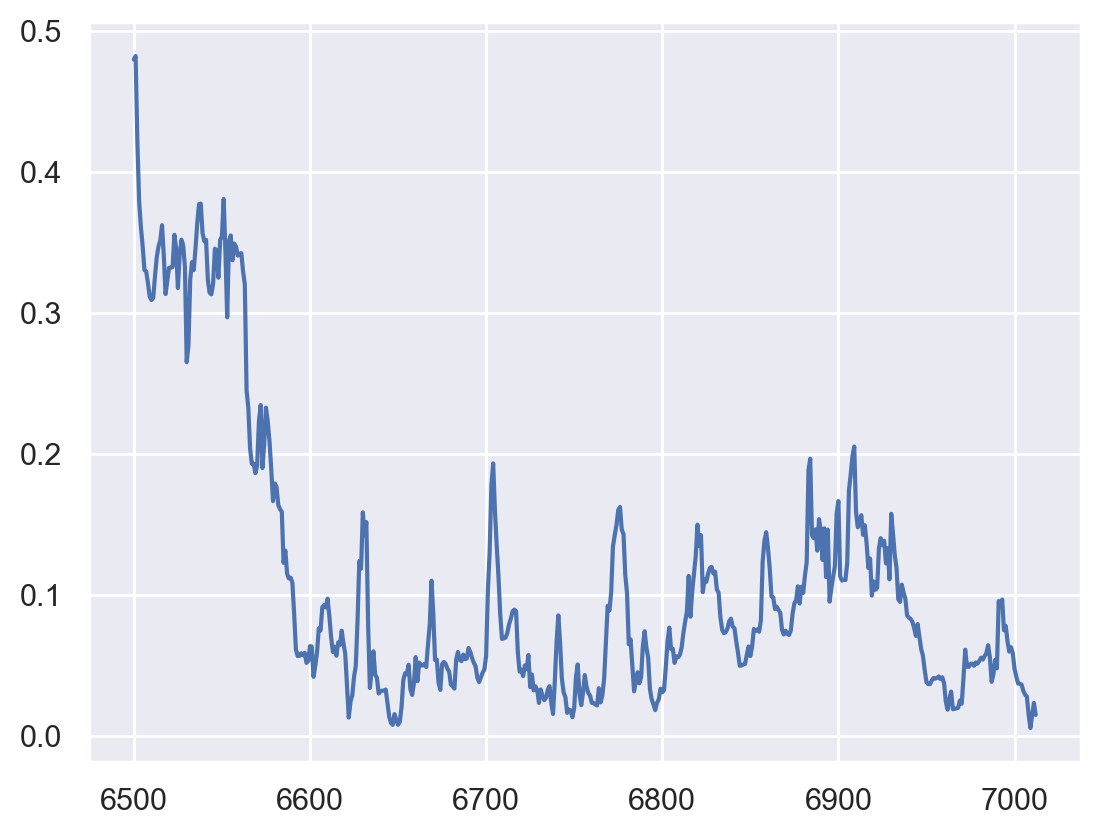

In [102]:
data = loader.data
train_size = 0.8
split_idx = int(len(data) * train_size)
temp = data[split_idx:]['normalized'].reset_index(drop=True)

plt.plot(temp[6500:])
plt.show()

# Setup for Plots

In [103]:
df = data.copy()
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date').sort_index()

### Daily Means over Time

/opt/miniconda3/envs/thesis/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/thesis/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


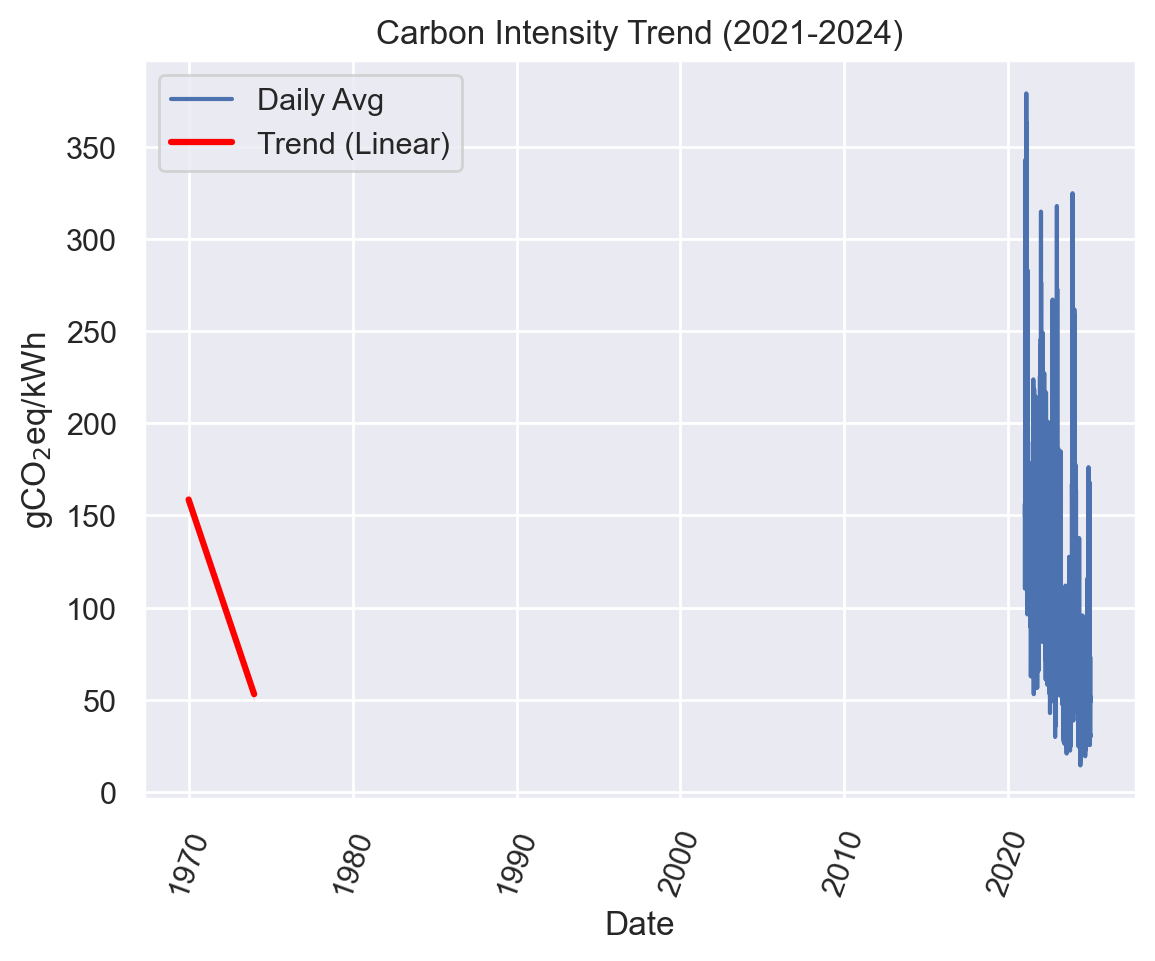

In [104]:
daily = df['carbon_intensity'].resample("D").mean()

plt.figure()
sns.lineplot(x=daily.index, y=daily, label='Daily Avg')
sns.regplot(x=np.arange(len(daily)), y=daily.values, scatter=False, label="Trend (Linear)", color='red')
plt.title('Carbon Intensity Trend (2021-2024)')
plt.ylabel(r"gCO$_2$eq/kWh")
plt.xlabel("Date")
plt.xticks(rotation=70)
plt.legend()
plt.show()

/opt/miniconda3/envs/thesis/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/thesis/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


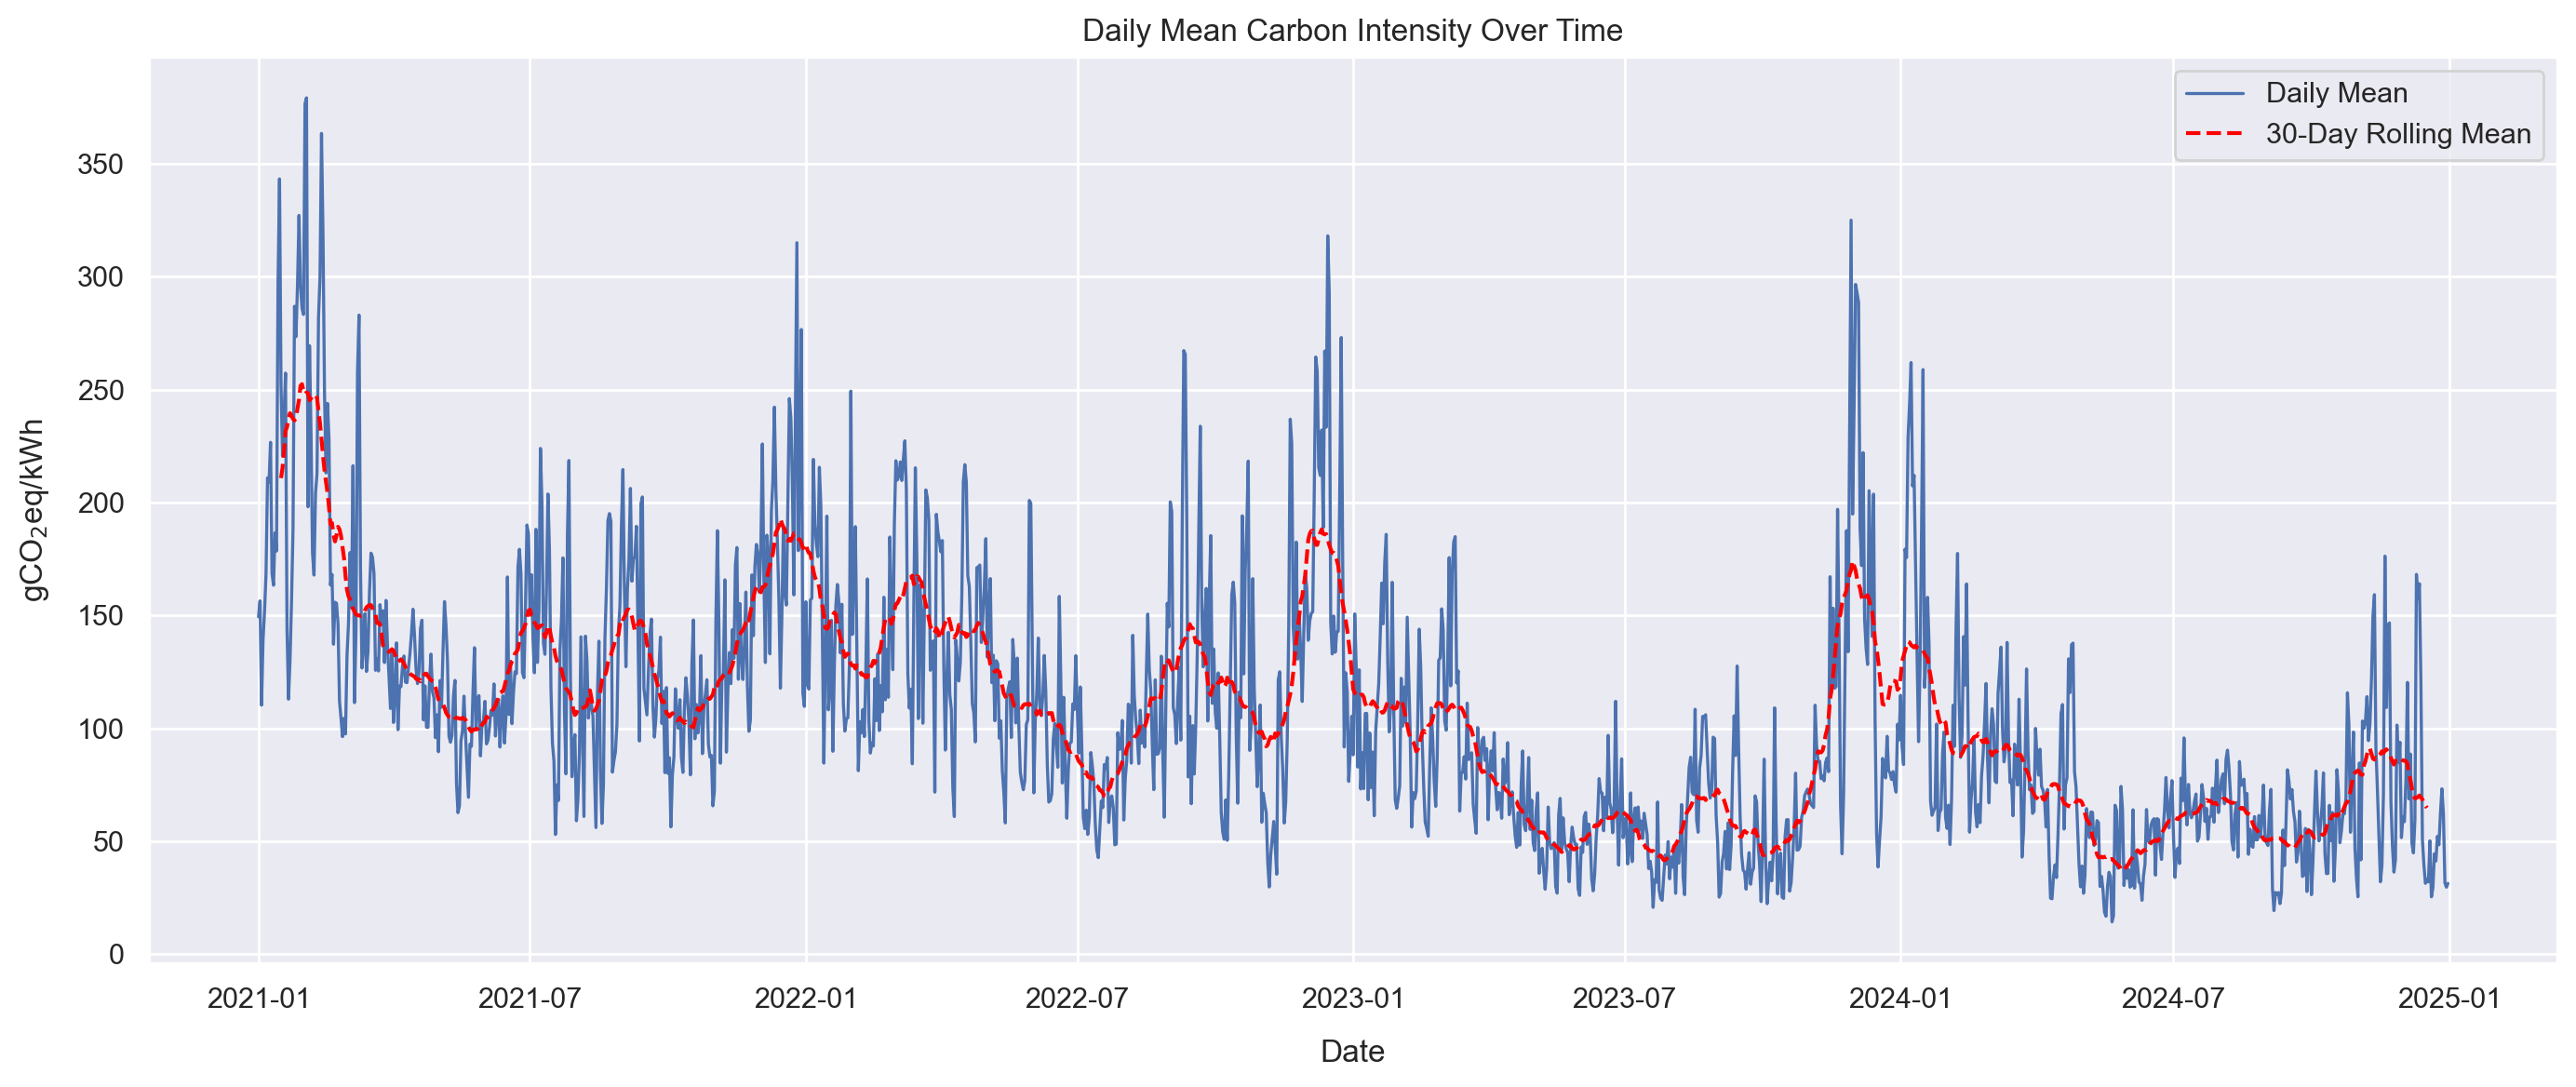

In [105]:
# Ensure datetime index is correct
# df['date'] = pd.to_datetime(df['date'])  # If not already datetime
# df.set_index('date', inplace=True)

# Resample to daily average
daily_mean = df['carbon_intensity'].resample('D').mean()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(x=daily_mean.index, y=daily_mean.values, label='Daily Mean', linewidth=1.2)

# Optional: Trend line via rolling average (30-day)
rolling = daily_mean.rolling(window=30, center=True).mean()
plt.plot(daily_mean.index, rolling, label='30-Day Rolling Mean', color='red', linestyle='--')

plt.title('Daily Mean Carbon Intensity Over Time')
plt.xlabel('Date', labelpad=10)
plt.ylabel(r'gCO$_2$eq/kWh', labelpad=10)
plt.legend()
plt.grid(True)
plt.tight_layout()
save_fig('daily-mean-over-time')
plt.show()


### Carbon Intensity By Month

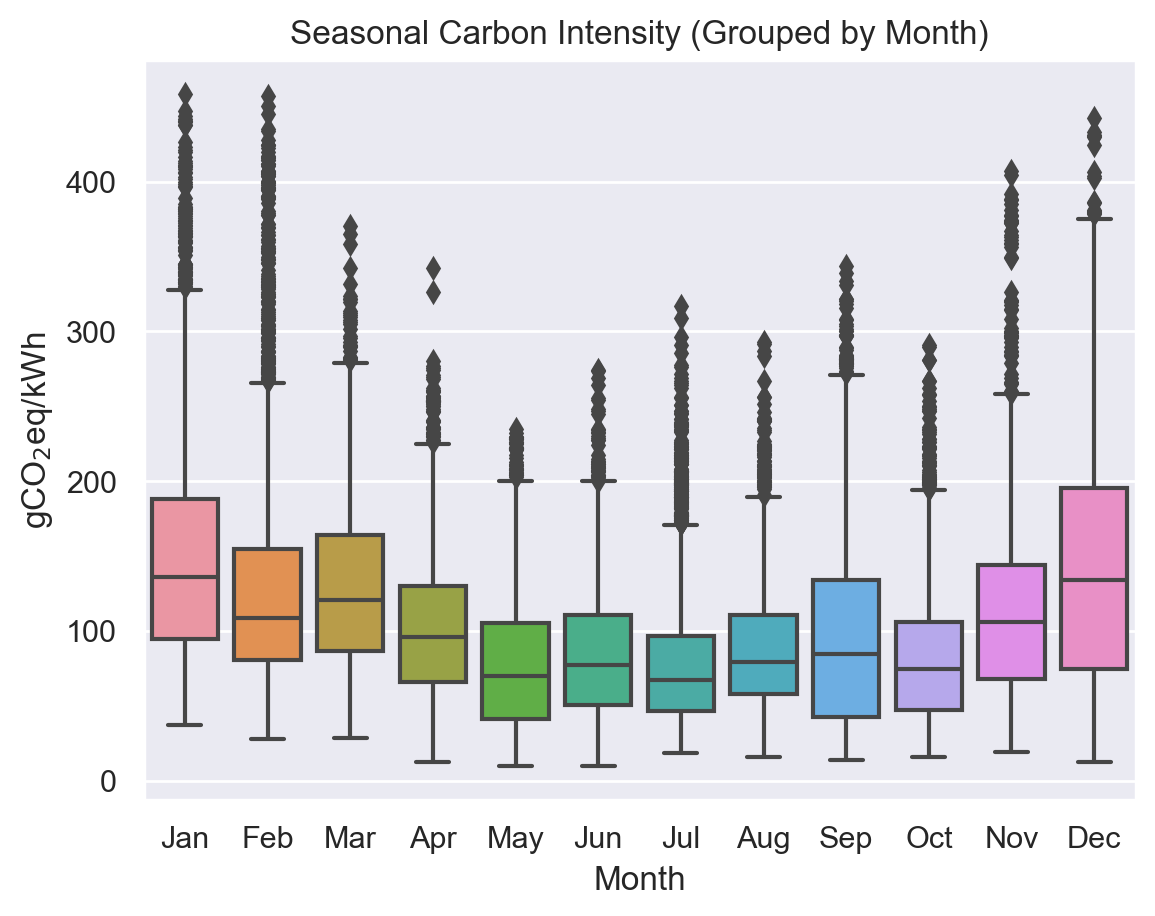

In [106]:
df['month'] = df.index.month
sns.boxplot(x='month', y='carbon_intensity', data=df)
plt.title("Seasonal Carbon Intensity (Grouped by Month)")
plt.xlabel("Month")
plt.xticks(ticks=np.arange(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
    'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.ylabel(r"gCO$_2$eq/kWh")
save_fig('seasonal-intensity-by-month')
plt.show()

### Year vs Year Comparison (Monthly Averages)

/var/folders/36/851rrf5541l1sfsl7zm8twvc0000gn/T/ipykernel_25366/3535432085.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['carbon_intensity'].resample("M").mean()


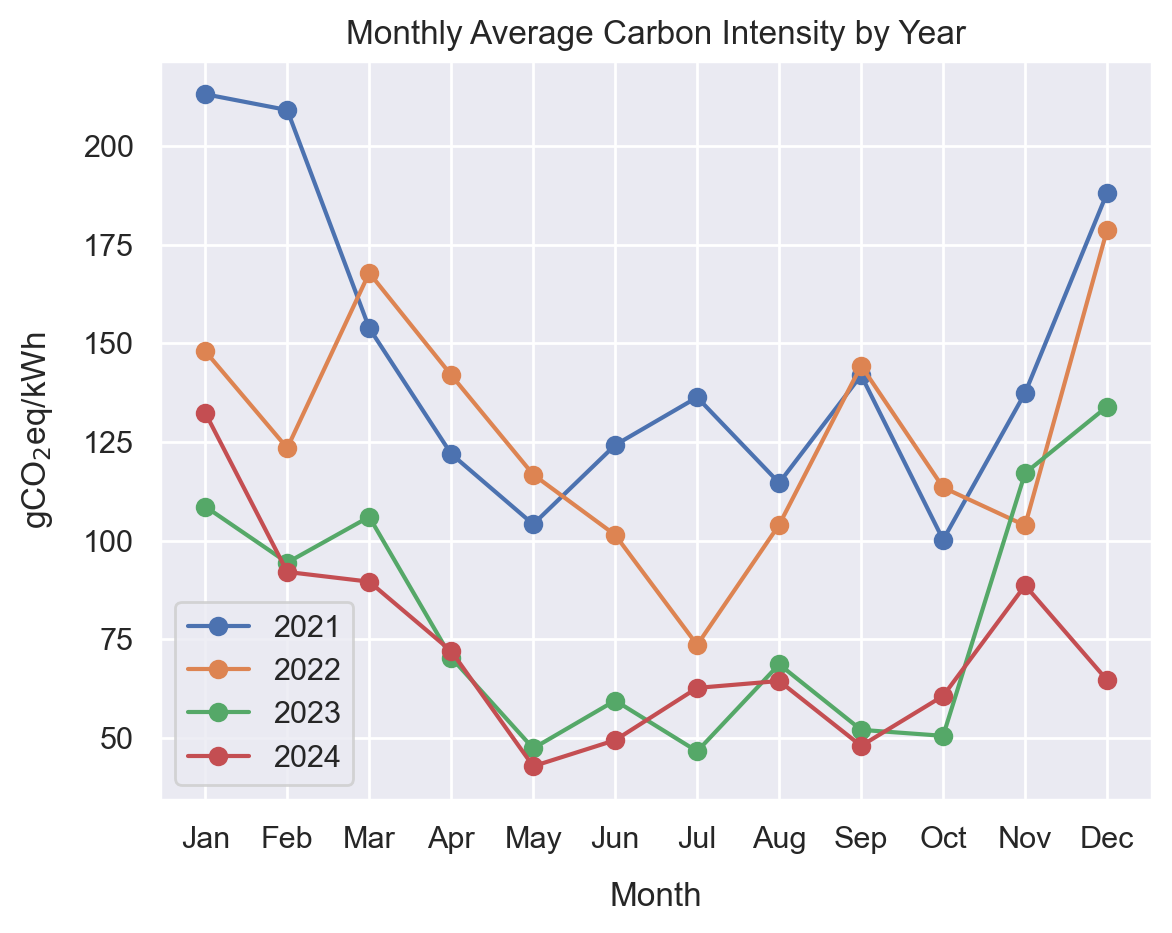

In [107]:
plt.rcParams['figure.dpi'] = 200
df['year'] = df.index.year
monthly_avg = df['carbon_intensity'].resample("M").mean()

monthly_df = monthly_avg.to_frame()
monthly_df['year'] = monthly_df.index.year
monthly_df['month'] = monthly_df.index.month

pivot = monthly_df.pivot(index='month', columns='year', values='carbon_intensity')

pivot.plot(marker='o')
plt.title("Monthly Average Carbon Intensity by Year")
plt.xlabel("Month", labelpad=10)
plt.ylabel(r"gCO$_2$eq/kWh", labelpad=10)
plt.xticks(ticks=np.arange(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
    'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(True)
# plt.legend(title='Year', loc='lower left')
plt.legend()
save_fig('month-avg-intensity-by-year')
plt.show()

### Distribution Analysis

/opt/miniconda3/envs/thesis/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


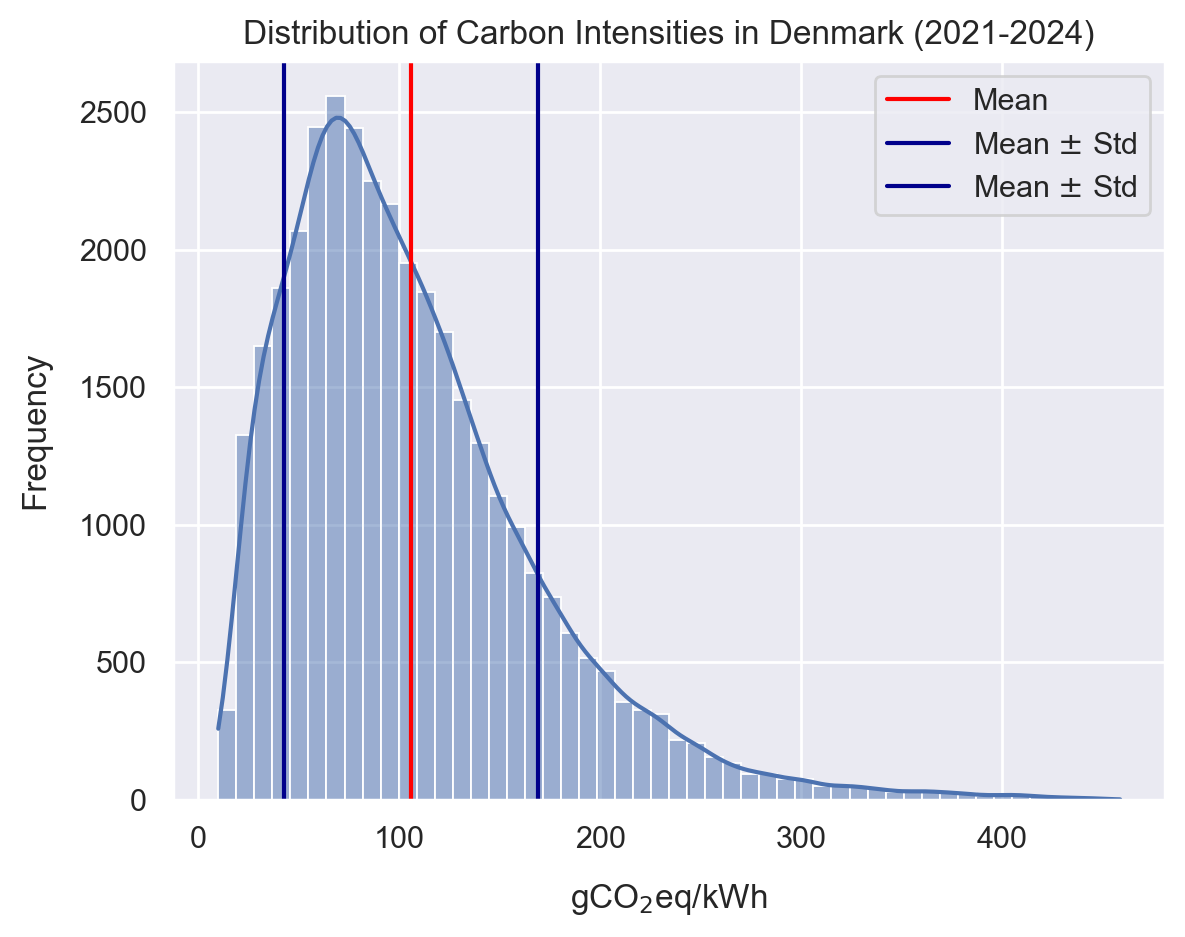

-- Carbon Intensity Stats --
count    35064.000000
mean       105.801519
std         63.037084
min          9.900000
5%          28.400000
25%         60.440000
50%         93.075000
75%        137.100000
95%        226.078500
max        458.500000
Name: carbon_intensity, dtype: float64
-- Normalized Carbon Intensity Stats --
count    35064.000000
mean         0.213780
std          0.140520
min          0.000000
5%           0.041240
25%          0.112660
50%          0.185410
75%          0.283550
95%          0.481897
max          1.000000
Name: normalized, dtype: float64


In [108]:
stats = df['carbon_intensity'].describe(percentiles=[.05, .25, .5, .75, .95])
sns.histplot(df['carbon_intensity'], kde=True, bins=50)
mean = stats['mean']
std = stats['std']
plt.axvline(mean, label='Mean', color='red')
plt.axvline(mean - std, label=r'Mean $\pm$ Std', color='darkblue')
plt.axvline(mean + std, label=r'Mean $\pm$ Std', color='darkblue')
plt.title('Distribution of Carbon Intensities in Denmark (2021-2024)')
plt.xlabel(r"gCO$_2$eq/kWh", labelpad=10)
plt.ylabel("Frequency", labelpad=10)
plt.legend()
save_fig('intensity-distribution')
plt.show()



print("-- Carbon Intensity Stats --")
print(stats)
print("-- Normalized Carbon Intensity Stats --")
print(df['normalized'].describe(percentiles=[.05, .25, .5, .75, .95]))

### Peak and Off-Peak Time Identification

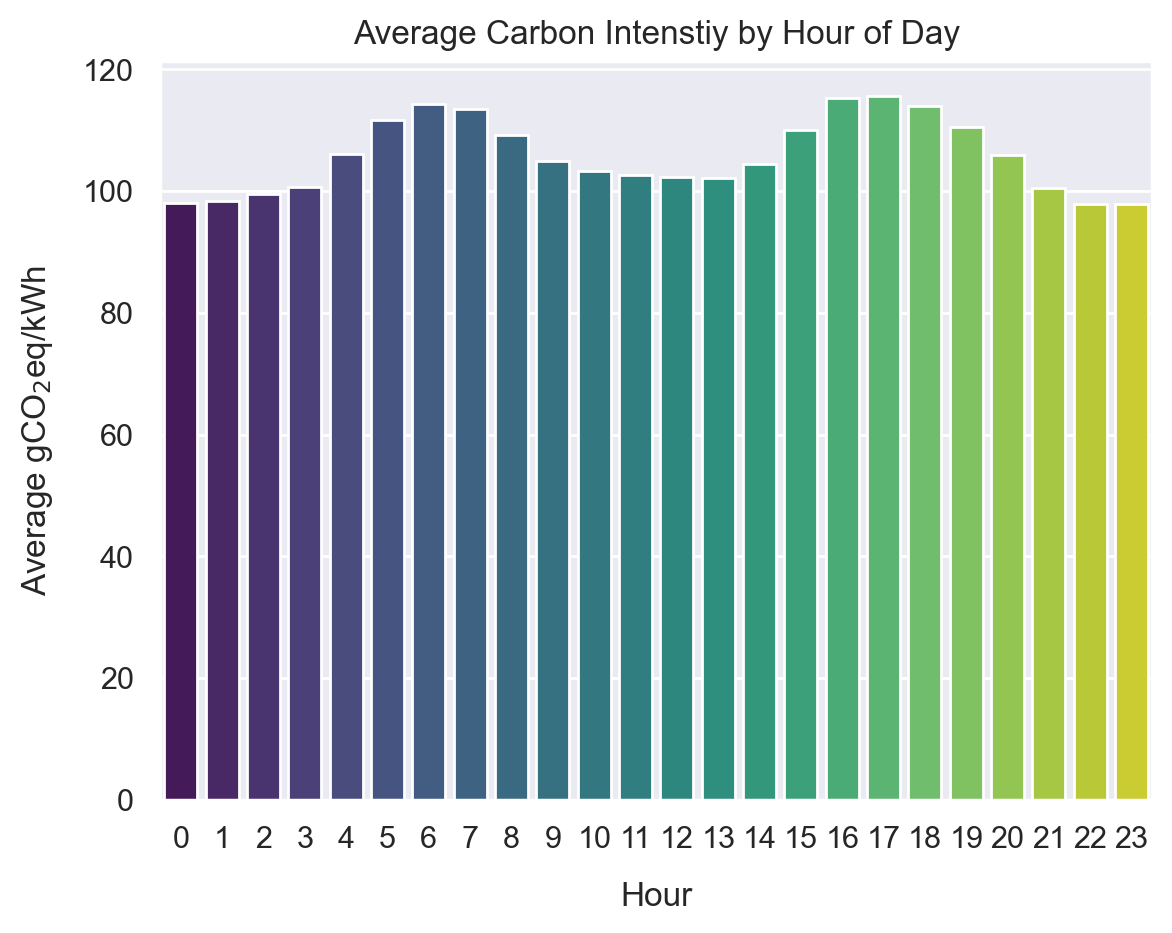

In [109]:
df['hour'] = df.index.hour
hourly_avg = df.groupby('hour')['carbon_intensity'].mean()

sns.barplot(x=hourly_avg.index, y=hourly_avg.values, palette='viridis')
plt.title("Average Carbon Intenstiy by Hour of Day")
plt.xlabel("Hour", labelpad=10)
plt.ylabel(r"Average gCO$_2$eq/kWh", labelpad=10)
plt.xticks(np.arange(0, 24))
plt.grid(True, axis='y')
save_fig('HIST-avg-hourly-intentiy-by-day')
plt.show()

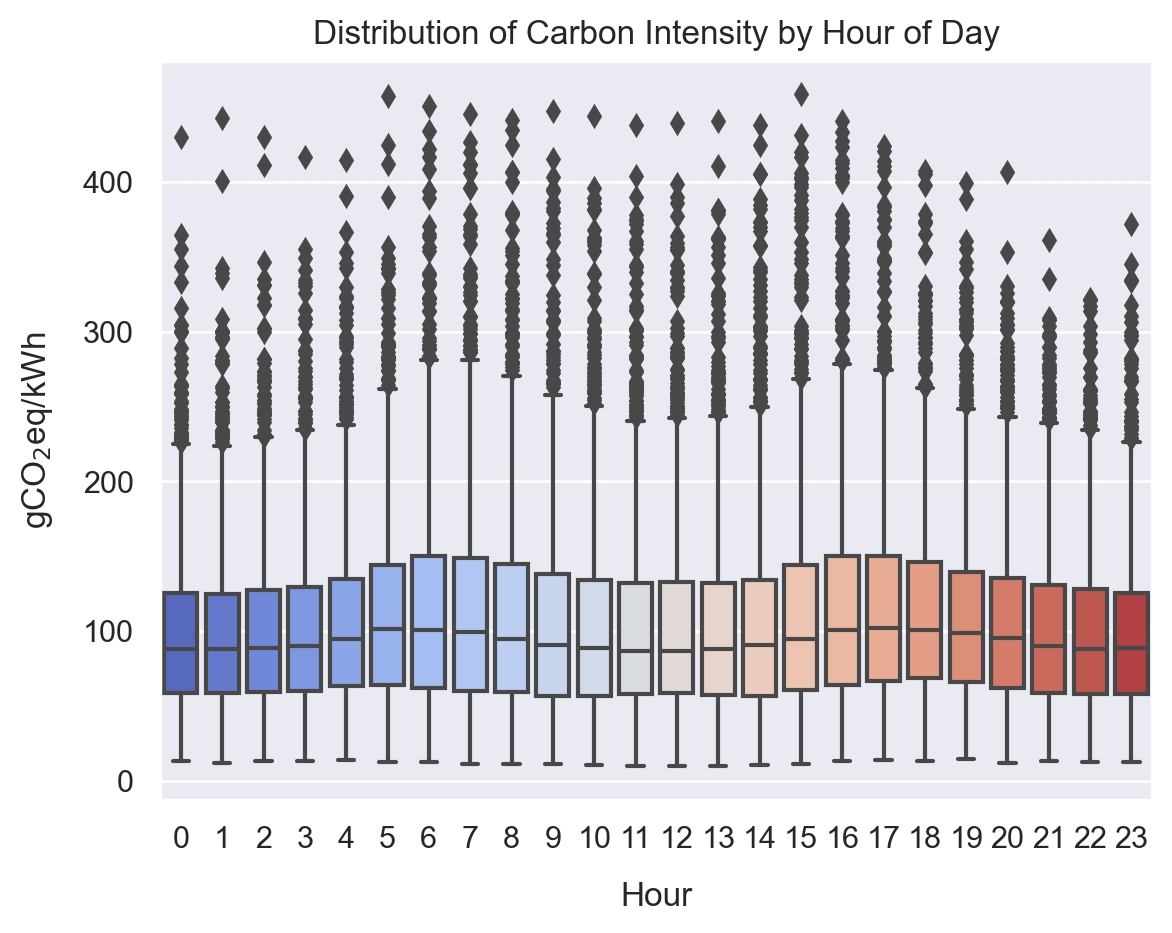

In [110]:
plt.figure()
sns.boxplot(x='hour', y='carbon_intensity', data=df, palette='coolwarm')
plt.title('Distribution of Carbon Intensity by Hour of Day')
plt.xlabel('Hour', labelpad=10)
plt.ylabel(r"gCO$_2$eq/kWh", labelpad=10)
plt.xticks(np.arange(0, 24))
save_fig('BOX-hourly-intensity-by-day')
plt.show()


In [111]:
from scipy.stats import f_oneway

groups = [g['carbon_intensity'].values for _, g in df.groupby('hour')]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4e}")

# If p-value < 0.05 the mean intensities significantly differ by hour!


ANOVA F-statistic: 13.71, p-value: 6.5022e-53


### Month-Hour

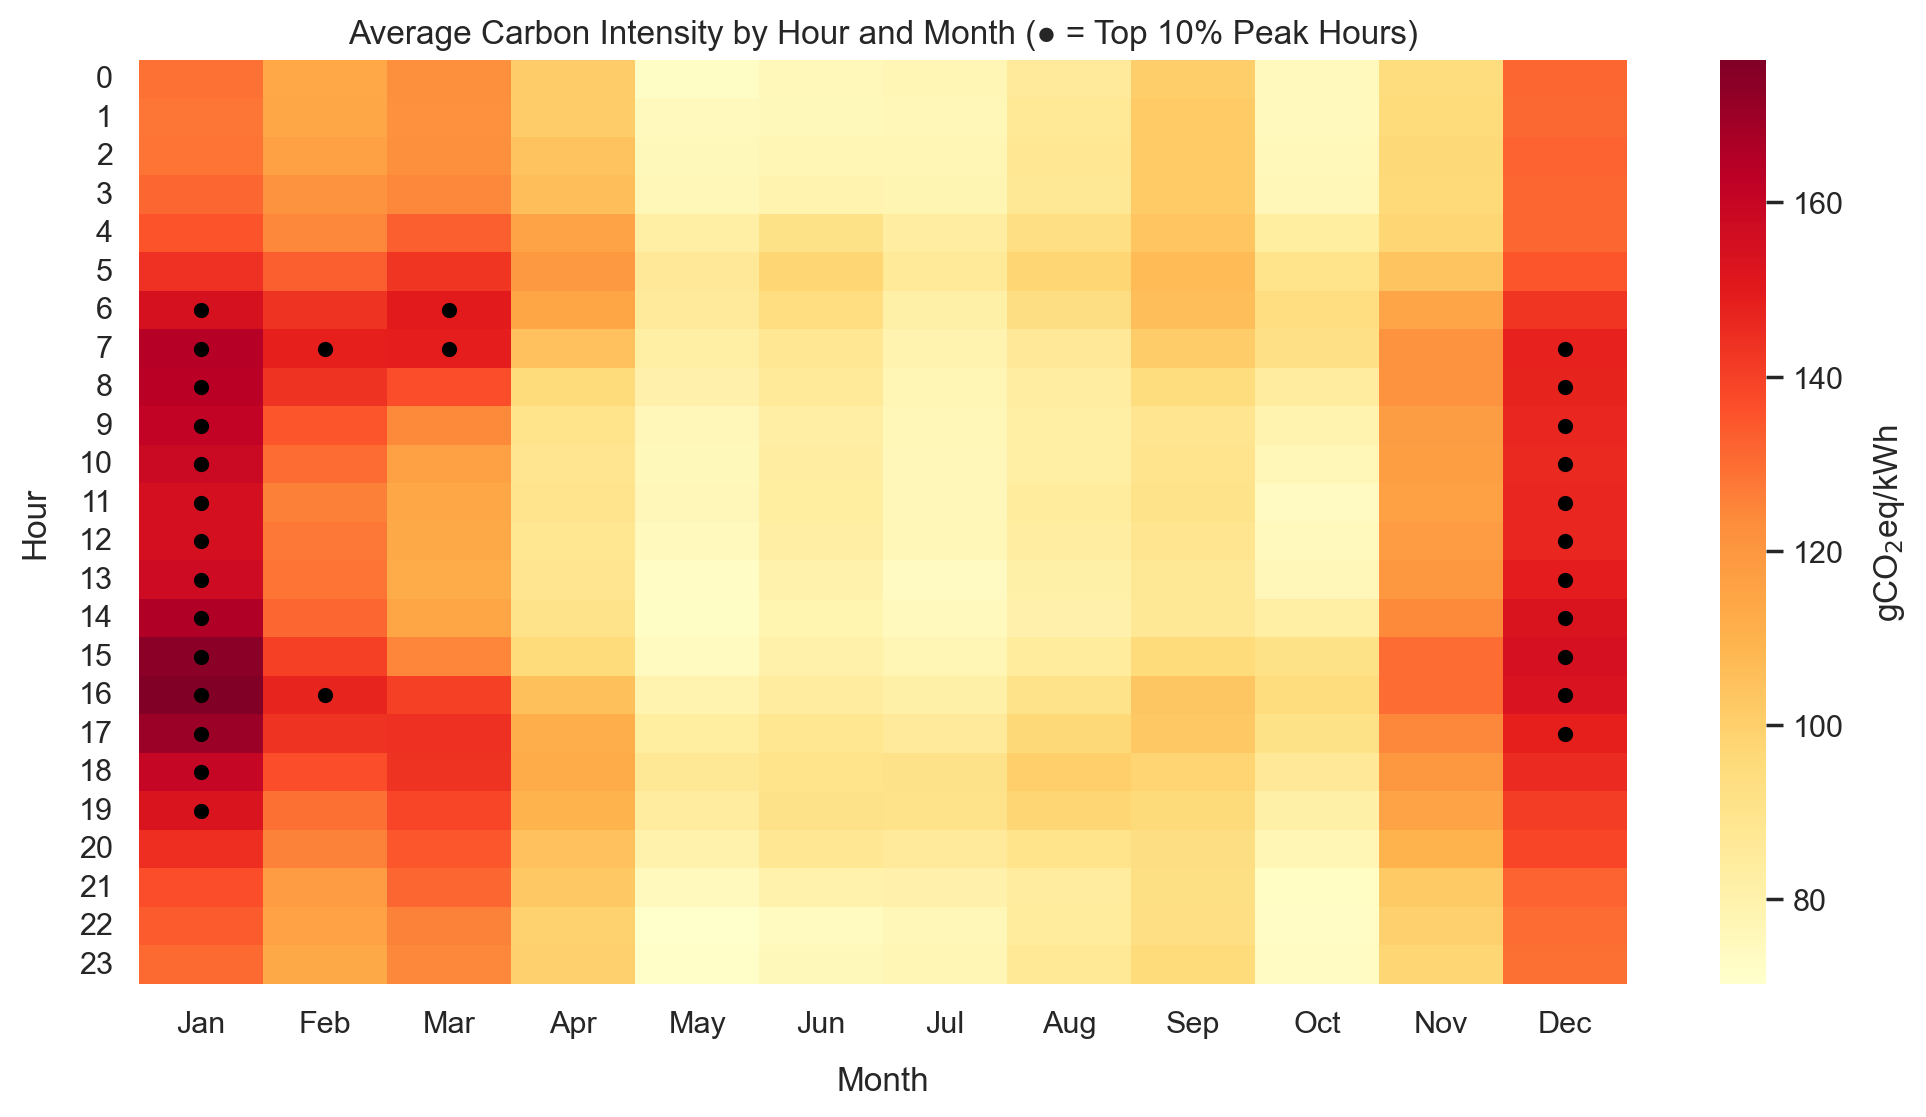

In [122]:
# Ensure datetime columns are set
df['month'] = df.index.month
df['hour'] = df.index.hour

# Pivot table of average intensity
month_hour = df.pivot_table(
    values='carbon_intensity',
    index='hour',
    columns='month',
    aggfunc='mean'
)
month_hour_threshold = np.nanpercentile(month_hour.values, 90)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(month_hour, cmap='YlOrRd', annot=False, fmt=".1f", cbar_kws={'label': r"gCO$_2$eq/kWh"})
cbar = plt.gca().collections[0].colorbar
cbar.set_label(r"gCO$_2$eq/kWh", labelpad=10)
for hour in range(24):
    for month in range(1, 13):
        value = month_hour.at[hour, month]
        if value >= month_hour_threshold:
            plt.scatter(month - 0.5, hour + 0.5, color='black', s=20)
plt.title('Average Carbon Intensity by Hour and Month (● = Top 10% Peak Hours)')
plt.xlabel('Month', labelpad=10)
plt.ylabel('Hour', labelpad=10)
plt.xticks(ticks=np.arange(12) + 0.5, labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.yticks(rotation=0)
save_fig('HEATMAP-avg-intensity-hour-month')
plt.show()


### Weekday-Hour

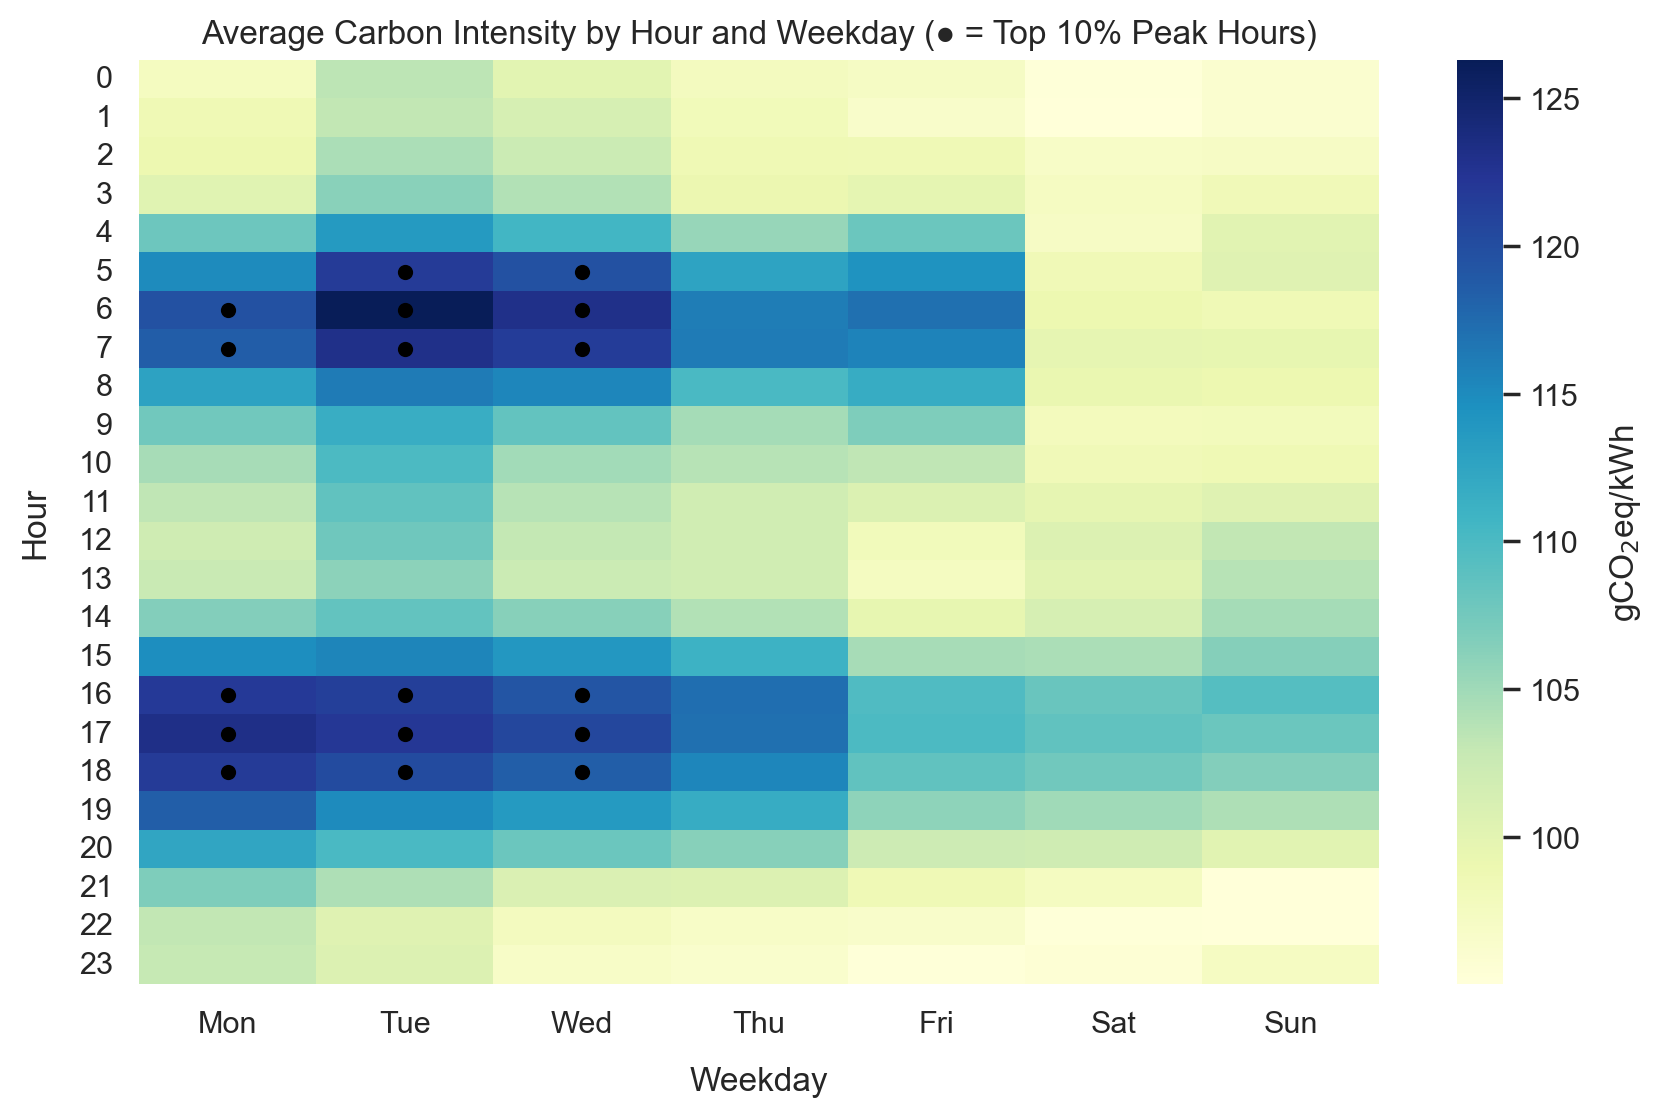

In [121]:
# Add weekday (0 = Monday, 6 = Sunday)
df['weekday'] = df.index.weekday

# Pivot table
weekday_hour = df.pivot_table(
    values='carbon_intensity',
    index='hour',
    columns='weekday',
    aggfunc='mean'
)
weekday_hour_threshold = np.nanpercentile(weekday_hour.values, 90)


# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(weekday_hour, cmap='YlGnBu', annot=False, fmt=".1f", cbar_kws={'label': r"gCO$_2$eq/kWh"})

cbar = plt.gca().collections[0].colorbar
cbar.set_label(r"gCO$_2$eq/kWh", labelpad=10)
for hour in range(24):
    for weekday in range(7):
        value = weekday_hour.at[hour, weekday]
        if value >= weekday_hour_threshold:
            plt.scatter(weekday + 0.5, hour + 0.5, color='black', s=20)
            # axes[1].text(weekday + 0.5, hour + 0.5, 'P', color='black',
            #              ha='center', va='center', fontsize=12, weight='bold')
plt.title('Average Carbon Intensity by Hour and Weekday (● = Top 10% Peak Hours)')
plt.xlabel('Weekday', labelpad=10)
plt.ylabel('Hour', labelpad=10)
plt.xticks(ticks=np.arange(7) + 0.5, labels=[
    'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'
])
plt.yticks(rotation=0)
save_fig('HEATMAP-avg-intensity-hour-weekday')
plt.show()


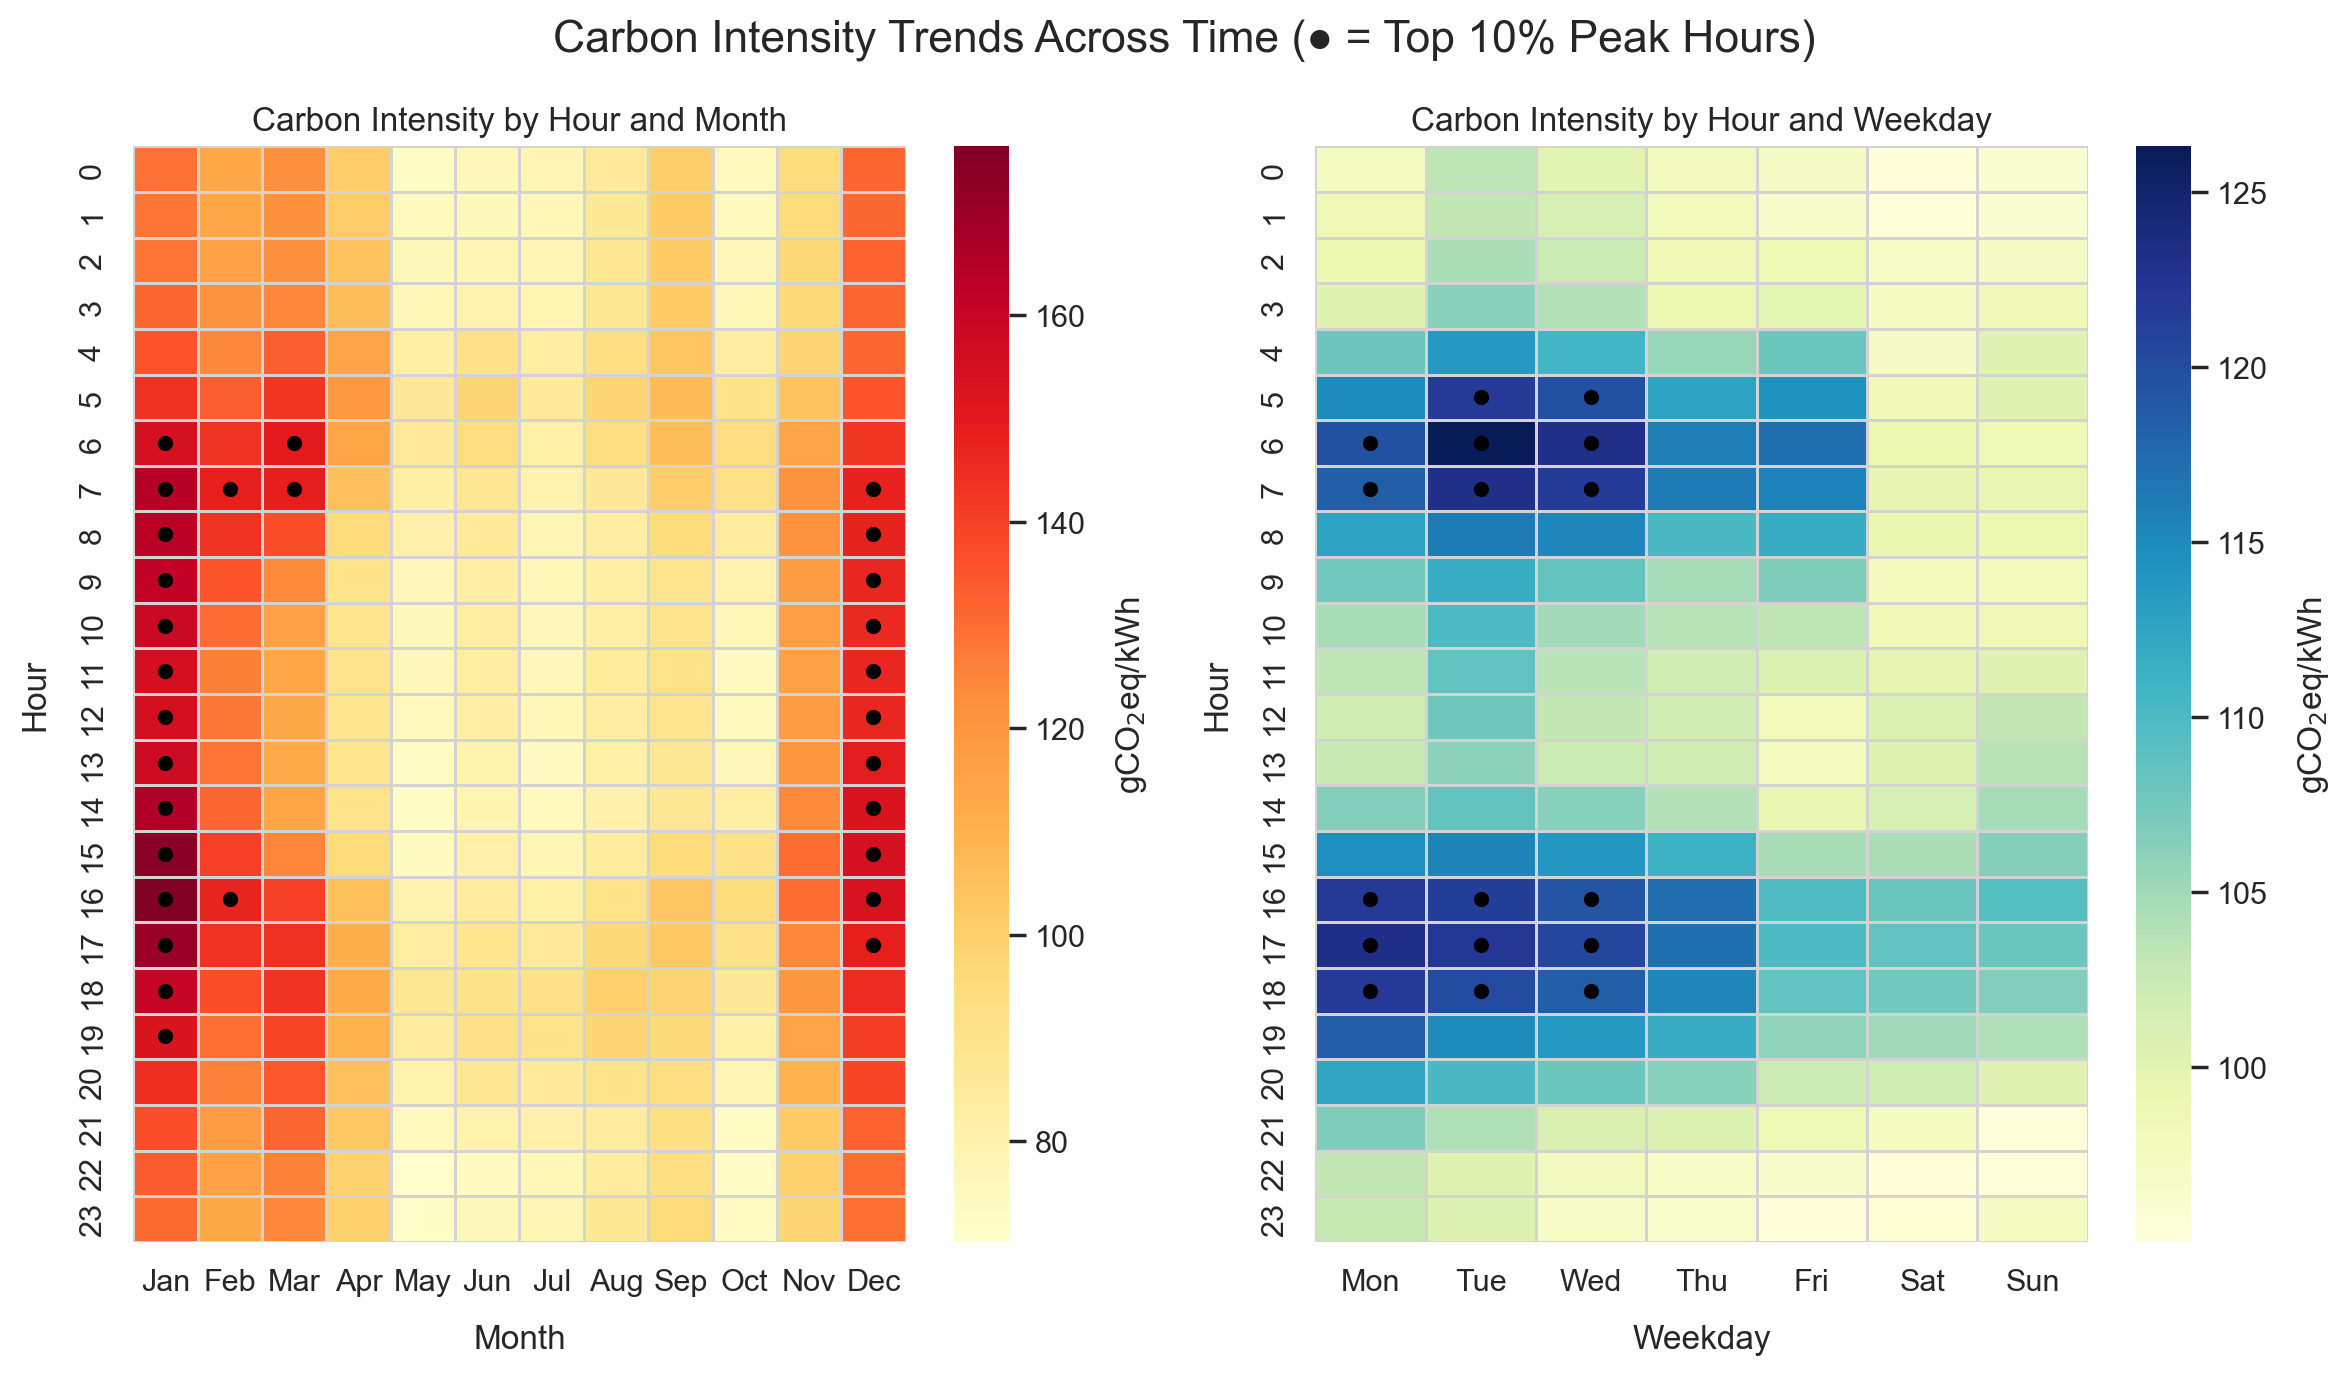

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Preprocessing ---
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday  # 0=Mon, 6=Sun

# Pivot for Month-Hour
month_hour = df.pivot_table(
    values='carbon_intensity',
    index='hour',
    columns='month',
    aggfunc='mean'
)

# Pivot for Weekday-Hour
weekday_hour = df.pivot_table(
    values='carbon_intensity',
    index='hour',
    columns='weekday',
    aggfunc='mean'
)

# Identify thresholds for top 10% of values
month_hour_threshold = np.nanpercentile(month_hour.values, 90)
weekday_hour_threshold = np.nanpercentile(weekday_hour.values, 90)

# --- Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(12, 7), sharey=False)

# Month-Hour Heatmap
sns.heatmap(
    month_hour,
    cmap='YlOrRd',
    ax=axes[0],
    cbar_kws={'label': r"gCO$_2$eq/kWh"},
    linewidths=0.5,
    linecolor='lightgray'
)
cbar = axes[0].collections[0].colorbar
cbar.set_label(r"gCO$_2$eq/kWh", labelpad=10)
axes[0].set_title('Carbon Intensity by Hour and Month')
axes[0].set_xlabel('Month', labelpad=10)
axes[0].set_ylabel('Hour', labelpad=10)
axes[0].set_xticks(np.arange(12) + 0.5)
axes[0].set_xticklabels([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
axes[0].set_yticks(np.arange(0.5, 24.5))
axes[0].set_yticklabels(range(24))

# Add peak hour markers
for hour in range(24):
    for month in range(1, 13):
        value = month_hour.at[hour, month]
        if value >= month_hour_threshold:
            axes[0].scatter(month - 0.5, hour + 0.5, color='black', s=20)
            # axes[0].text(month - 1 + 0.5, hour + 0.5, '★', color='black',
                        #  ha='center', va='center', fontsize=12, weight='bold')

# Weekday-Hour Heatmap
sns.heatmap(
    weekday_hour,
    cmap='YlGnBu',
    ax=axes[1],
    cbar_kws={'label': r"gCO$_2$eq/kWh"},
    linewidths=0.5,
    linecolor='lightgray'
)
cbar = axes[1].collections[0].colorbar
cbar.set_label(r"gCO$_2$eq/kWh", labelpad=10)
axes[1].set_title('Carbon Intensity by Hour and Weekday')
axes[1].set_xlabel('Weekday', labelpad=10)
axes[1].set_ylabel('Hour', labelpad=10)
axes[1].set_xticks(np.arange(7) + 0.5)
axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
# axes[1].set_yticks(np.arange(0.5, 24.5))
# axes[1].set_yticklabels(range(24))

# Add peak hour markers
for hour in range(24):
    for weekday in range(7):
        value = weekday_hour.at[hour, weekday]
        if value >= weekday_hour_threshold:
            axes[1].scatter(weekday + 0.5, hour + 0.5, color='black', s=20)
            # axes[1].text(weekday + 0.5, hour + 0.5, 'P', color='black',
            #              ha='center', va='center', fontsize=12, weight='bold')

plt.suptitle(
    'Carbon Intensity Trends Across Time (● = Top 10% Peak Hours)',
    fontsize=16,
    # ha='center',
    fontweight='book'
    )
plt.tight_layout()
save_fig('HEATMAP-avg-intensity')
plt.show()
